# Import librairies et fichier

In [1]:
import pandas as pd
import numpy as np


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans


from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import matplotlib.pyplot as plt

from matplotlib.collections import LineCollection

import seaborn as sns


In [2]:
df = pd.read_csv('file:///C:/Users/boisj/dataset_P9_JPB.csv',index_col=0)
df

,dispo_interieure,dispo_interieure_CAGR%,production,productions_CAGR%,%production,importations,importations_CAGR%,%importations,population (milliers),population_CAGR%,pib/hab,pib/hab_CAGR%,pib (millions$),pib (millions$)_CAGR%,stabilité,stabilité_moy
pays,,,,,,,,,,,,,,,,
Afghanistan,61.0,-0.96,28.0,0.00,45.90,33.0,2.62,54.10,40099.462,2.38,372.548875,-6.81,1.493901e+04,-4.59,-2.53,-2.692
Afrique du Sud,2632.0,4.52,1922.0,2.91,73.02,372.0,-6.26,14.13,59392.255,0.95,7055.055176,0.97,4.190156e+05,1.93,-0.71,-0.346
Albanie,63.0,13.81,14.0,1.49,22.22,48.0,19.14,76.19,2854.710,-0.17,6396.461812,7.18,1.826004e+04,7.00,0.11,0.212
Algérie,258.0,-2.04,258.0,-1.90,100.00,0.0,-100.00,0.00,44177.969,1.44,3700.324058,-2.20,1.634728e+05,-0.79,-0.88,-0.904
Allemagne,1565.0,0.10,1546.0,0.42,98.79,768.0,-1.82,49.07,83408.554,0.19,51073.117894,2.72,4.259935e+06,2.91,0.76,0.638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,460.0,-1.46,56.0,-0.35,12.17,529.0,2.44,115.00,9365.145,0.65,43295.393082,0.36,4.054676e+05,1.01,0.65,0.656
Équateur,440.0,5.29,440.0,5.29,100.00,1.0,0.00,0.23,17797.737,1.29,5965.132871,-0.92,1.061659e+05,0.36,-0.27,-0.186
États-Unis d'Amérique,19460.0,1.23,23223.0,1.17,119.34,144.0,3.20,0.74,336997.624,0.43,69184.704400,3.22,2.331508e+07,3.66,0.00,0.174


# Description rapide du fichier

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, Afghanistan to Îles Salomon
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dispo_interieure        173 non-null    float64
 1   dispo_interieure_CAGR%  173 non-null    float64
 2   production              173 non-null    float64
 3   productions_CAGR%       173 non-null    float64
 4   %production             173 non-null    float64
 5   importations            173 non-null    float64
 6   importations_CAGR%      173 non-null    float64
 7   %importations           173 non-null    float64
 8   population (milliers)   173 non-null    float64
 9   population_CAGR%        173 non-null    float64
 10  pib/hab                 173 non-null    float64
 11  pib/hab_CAGR%           173 non-null    float64
 12  pib (millions$)         173 non-null    float64
 13  pib (millions$)_CAGR%   173 non-null    float64
 14  stabilité               173 

In [4]:
df.nunique()

dispo_interieure          144
dispo_interieure_CAGR%    148
production                124
productions_CAGR%         130
%production               150
importations               96
importations_CAGR%        118
%importations             145
population (milliers)     173
population_CAGR%          135
pib/hab                   173
pib/hab_CAGR%             159
pib (millions$)           173
pib (millions$)_CAGR%     159
stabilité                 130
stabilité_moy             161
dtype: int64

In [5]:
df.duplicated().sum()

0

# Classification ascendante hiérarchique

## Normalisation des variables

Nous allons garder les variables ratio de 2021 et créer celle du rapport entre importation et population. Les variables d'évolutions (cagr) seront utiles en conclusion. 

In [6]:
var_ratio=['%production','pib/hab','%importations','stabilité']
df2=df[var_ratio]
df2['import/pop']=df['importations']/df['population (milliers)']*100
df2

C:\Users\boisj\AppData\Local\Temp\ipykernel_8036\1774421846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['import/pop']=df['importations']/df['population (milliers)']*100


,%production,pib/hab,%importations,stabilité,import/pop
pays,,,,,
Afghanistan,45.90,372.548875,54.10,-2.53,0.082295
Afrique du Sud,73.02,7055.055176,14.13,-0.71,0.626344
Albanie,22.22,6396.461812,76.19,0.11,1.681432
Algérie,100.00,3700.324058,0.00,-0.88,0.000000
Allemagne,98.79,51073.117894,49.07,0.76,0.920769
...,...,...,...,...,...
Émirats arabes unis,12.17,43295.393082,115.00,0.65,5.648604
Équateur,100.00,5965.132871,0.23,-0.27,0.005619
États-Unis d'Amérique,119.34,69184.704400,0.74,0.00,0.042730


## Calcul des distances


In [7]:
Z = linkage(df2, method="ward")
pd.DataFrame(Z)

,0,1,2,3
0,124.0,171.0,11.068179,2.0
1,9.0,60.0,12.703194,2.0
2,23.0,149.0,14.864271,2.0
3,75.0,96.0,18.919858,2.0
4,66.0,82.0,19.104308,2.0
...,...,...,...,...
167,86.0,330.0,47912.330098,4.0
168,334.0,336.0,51430.056775,35.0
169,339.0,340.0,126174.114619,21.0
170,338.0,341.0,129319.296769,152.0


In [8]:
names = df2.index.values
names[:10]

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie'], dtype=object)

In [9]:
themes = df2.columns.values
themes[:10]

array(['%production', 'pib/hab', '%importations', 'stabilité',
       'import/pop'], dtype=object)

## Affichage du dendogramme


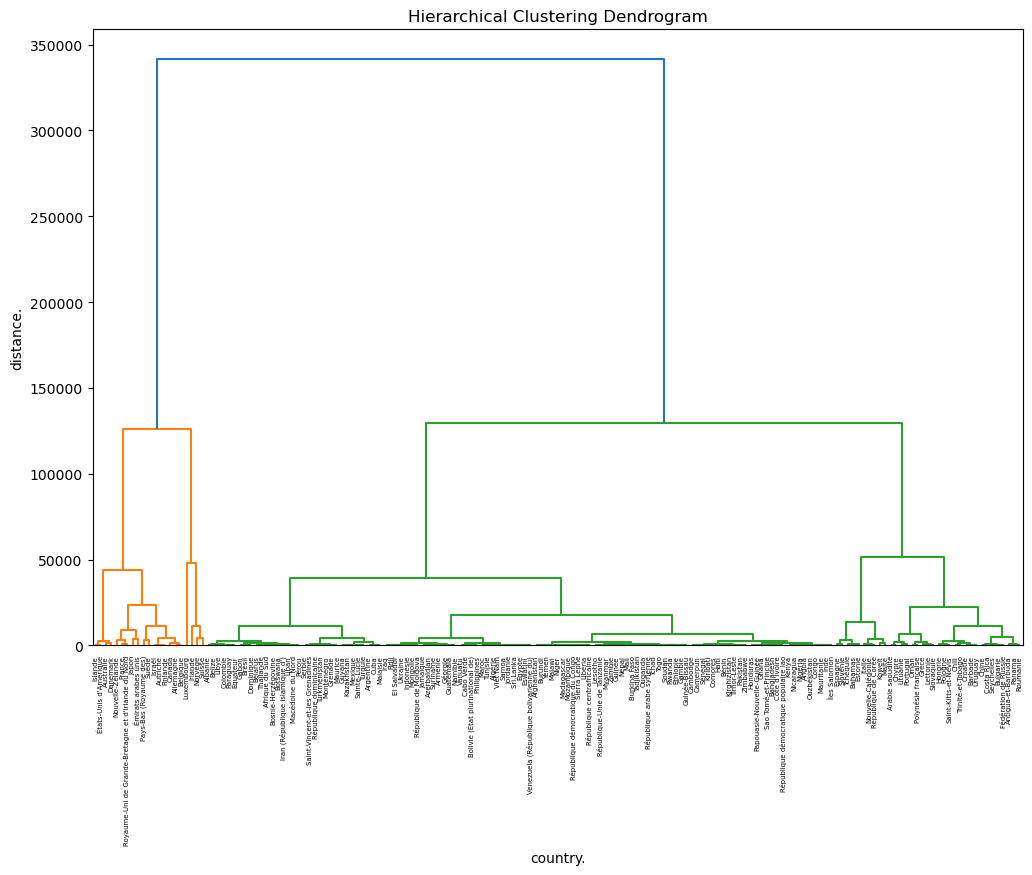

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, ax=ax,labels=names)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("country.")
plt.ylabel("distance.")
plt.show()

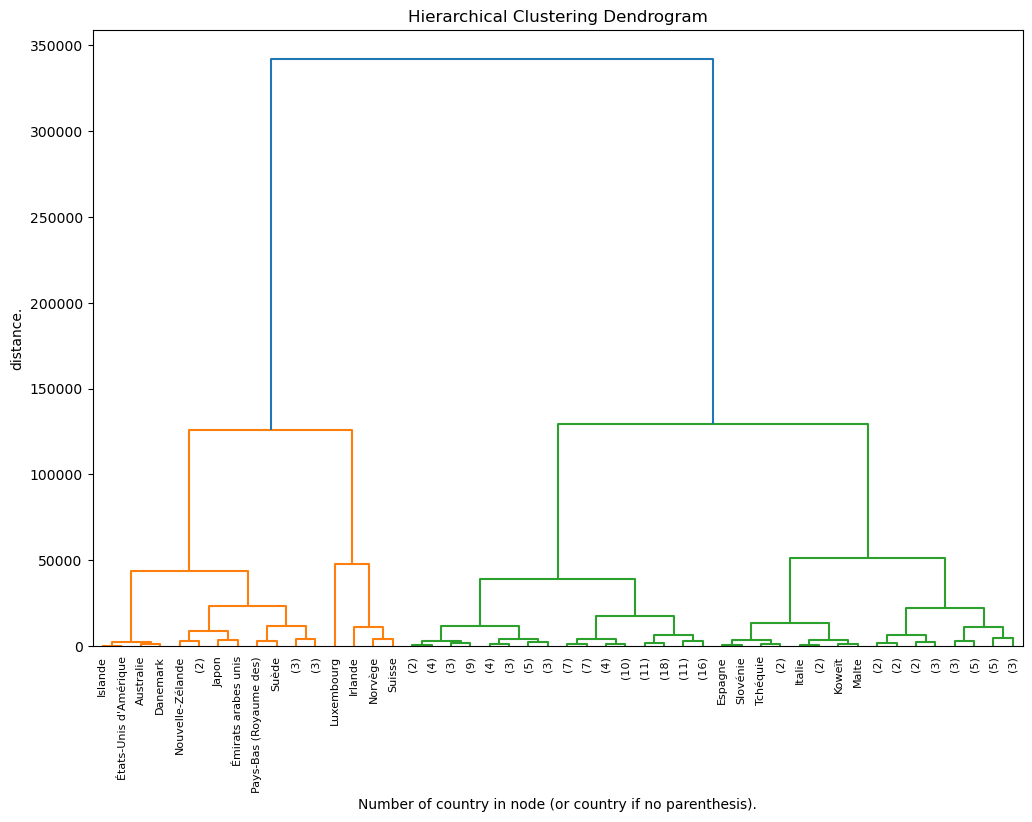

In [11]:
#Pour plus de lisibilité, on choisit d'afficher les clusters issus de 5 noeuds
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=5, truncate_mode="level", labels=names, ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.ylabel("distance.")
plt.xlabel("Number of country in node (or country if no parenthesis).")
plt.show()

On peut penser qu'il y a 4 clusters intéressants

## Clustering avec CAH

In [12]:
cah = AgglomerativeClustering(n_clusters=4, linkage="ward")

In [13]:
df_cah=df2.copy()
cah.fit(df_cah)

AgglomerativeClustering(n_clusters=4)

In [14]:
dd = {i:j for i,j in enumerate(list('abcd'))}
labelss = [dd[i] for i in cah.labels_]
labelss[:10]

['c', 'c', 'c', 'c', 'd', 'c', 'a', 'a', 'c', 'c']

In [15]:
df_cah['cluster']=labelss

In [16]:
df_cah.groupby('cluster').count()

,%production,pib/hab,%importations,stabilité,import/pop
cluster,,,,,
a,35,35,35,35,35
b,4,4,4,4,4
c,117,117,117,117,117
d,17,17,17,17,17


In [17]:
display(df_cah.loc[df_cah['cluster']=='a'].sample(n=4))
display(df_cah.loc[df_cah['cluster']=='b'].sample(n=4))
display(df_cah.loc[df_cah['cluster']=='c'].sample(n=4)) 
display(df_cah.loc[df_cah['cluster']=='d'].sample(n=4))

,%production,pib/hab,%importations,stabilité,import/pop,cluster
pays,,,,,,
Lettonie,74.47,21267.462243,104.26,0.69,2.614841,a
Saint-Kitts-et-Nevis,0.00,18082.687990,75.00,0.96,6.301727,a
Portugal,112.54,24651.176435,26.33,0.95,0.816318,a
Seychelles,0.00,12084.627639,80.00,0.76,3.756892,a


,%production,pib/hab,%importations,stabilité,import/pop,cluster
pays,,,,,,
Luxembourg,0.00,133745.401502,116.67,1.21,2.189823,b
Suisse,71.24,93525.366191,30.07,1.13,0.529258,b
Norvège,96.64,89241.713938,3.36,1.10,0.074033,b
Irlande,114.79,101108.989159,57.75,0.86,1.644431,b


,%production,pib/hab,%importations,stabilité,import/pop,cluster
pays,,,,,,
Sainte-Lucie,9.09,9824.062102,90.91,0.85,5.566348,c
Suriname,43.33,5259.262972,53.33,0.37,2.610178,c
Gabon,4.44,7910.846083,95.56,-0.09,3.673363,c
Éthiopie,106.06,825.291114,1.52,-2.07,0.000831,c


,%production,pib/hab,%importations,stabilité,import/pop,cluster
pays,,,,,,
Islande,81.82,69133.134082,18.18,1.37,0.540052,d
États-Unis d'Amérique,119.34,69184.704400,0.74,0.00,0.042730,d
Canada,98.27,52112.061496,12.89,0.94,0.526798,d
Nouvelle-Zélande,110.68,48823.507780,0.49,1.44,0.019494,d


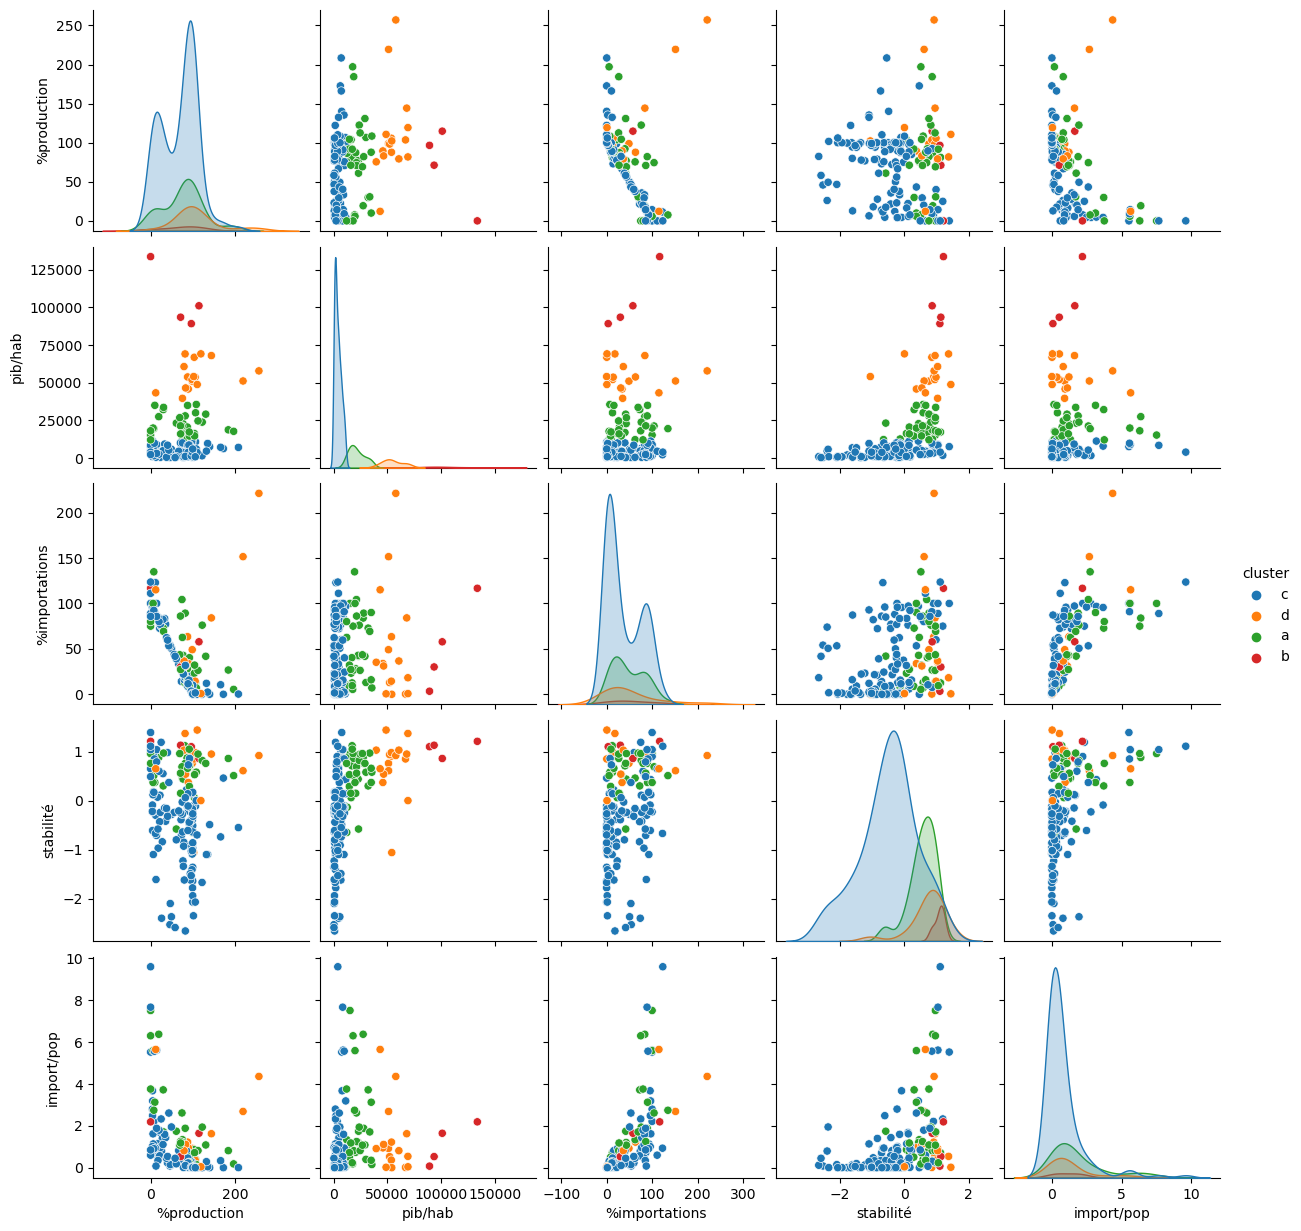

In [18]:
sns.pairplot(data=df_cah, hue='cluster')

# Méthode des k-means

On effectue un clustering avec l'algorithme du k-means en utilisant d'abord la méthode du 'coude'

## Elbow method

In [19]:
df_elbow=df2.copy()

In [20]:
# Une liste vide pour enregistrer les inerties :  

intertia_list = [ ]


#On défini  la liste du nombre de clusters que l'on veut tester
k_list = range(1, 10)

for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(df_elbow)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

C:\Users\boisj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


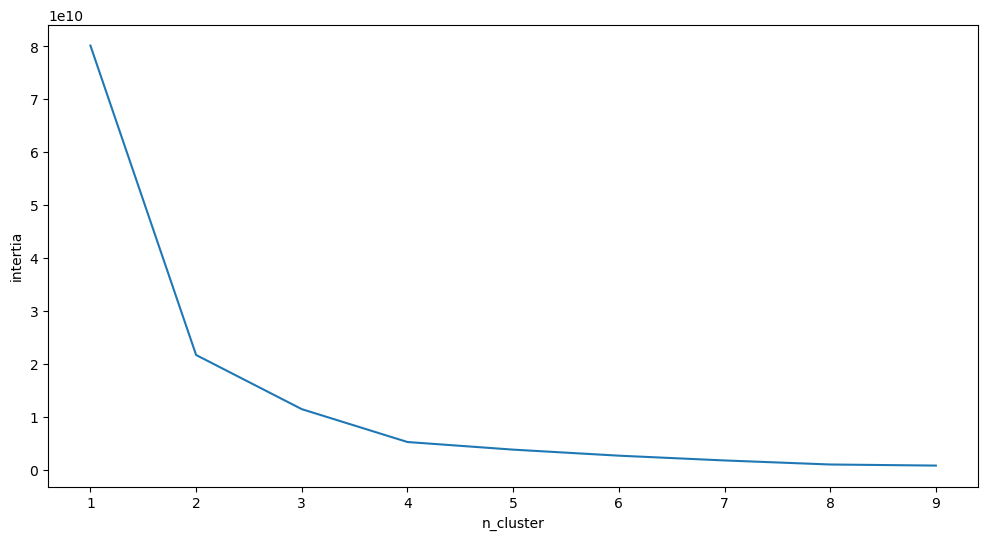

In [21]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia_list)

La méthode elbow nous donne une dernière cassure au niveau de 2,3 et 4 clusters

## Clusters

Nous allons choisir 4 clusters pour être le plus précis possible

In [22]:
df_kmeans=df2.copy()
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_kmeans)

KMeans(n_clusters=4)

In [23]:
labels=kmeans.labels_


In [24]:
#Plutôt que des 0, 1, 2,3 et 4, on préfère utiliser des lettres pour bien identifier la catégorie de chaque pays
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['a', 'a', 'a', 'a', 'b', 'a', 'd', 'd', 'a', 'a']

In [25]:
df_kmeans['cluster'] = labels
df_kmeans.head()

,%production,pib/hab,%importations,stabilité,import/pop,cluster
pays,,,,,,
Afghanistan,45.90,372.548875,54.10,-2.53,0.082295,a
Afrique du Sud,73.02,7055.055176,14.13,-0.71,0.626344,a
Albanie,22.22,6396.461812,76.19,0.11,1.681432,a
Algérie,100.00,3700.324058,0.00,-0.88,0.000000,a
Allemagne,98.79,51073.117894,49.07,0.76,0.920769,b


In [26]:
df_kmeans.groupby('cluster').count()

,%production,pib/hab,%importations,stabilité,import/pop
cluster,,,,,
a,122,122,122,122,122
b,17,17,17,17,17
c,4,4,4,4,4
d,30,30,30,30,30


In [27]:
display(df_kmeans.loc[df_kmeans['cluster']=='a'].sample(n=4))
display(df_kmeans.loc[df_kmeans['cluster']=='b'].sample(n=4))
display(df_kmeans.loc[df_kmeans['cluster']=='c'].sample(n=4)) 
display(df_kmeans.loc[df_kmeans['cluster']=='d'].sample(n=4))

,%production,pib/hab,%importations,stabilité,import/pop,cluster
pays,,,,,,
Algérie,100.00,3700.324058,0.00,-0.88,0.000000,a
Mozambique,76.80,491.839113,23.20,-1.23,0.130935,a
Mexique,75.65,10045.676371,24.39,-0.64,0.938399,a
Argentine,106.71,10761.081627,0.46,-0.11,0.022086,a


,%production,pib/hab,%importations,stabilité,import/pop,cluster
pays,,,,,,
Belgique,219.42,51165.510222,151.46,0.61,2.687010,b
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,83.16,46541.756927,31.14,0.54,1.110268,b
Finlande,105.76,53703.452520,14.39,0.98,0.361272,b
États-Unis d'Amérique,119.34,69184.704400,0.74,0.00,0.042730,b


,%production,pib/hab,%importations,stabilité,import/pop,cluster
pays,,,,,,
Suisse,71.24,93525.366191,30.07,1.13,0.529258,c
Irlande,114.79,101108.989159,57.75,0.86,1.644431,c
Norvège,96.64,89241.713938,3.36,1.10,0.074033,c
Luxembourg,0.00,133745.401502,116.67,1.21,2.189823,c


,%production,pib/hab,%importations,stabilité,import/pop,cluster
pays,,,,,,
Bahamas,19.35,27478.389629,83.87,0.88,6.374018,d
Estonie,82.14,27990.621029,89.29,0.76,1.881537,d
Arabie saoudite,61.03,23185.870792,41.99,-0.58,1.741288,d
Lituanie,122.54,23844.125650,76.06,0.82,1.937810,d


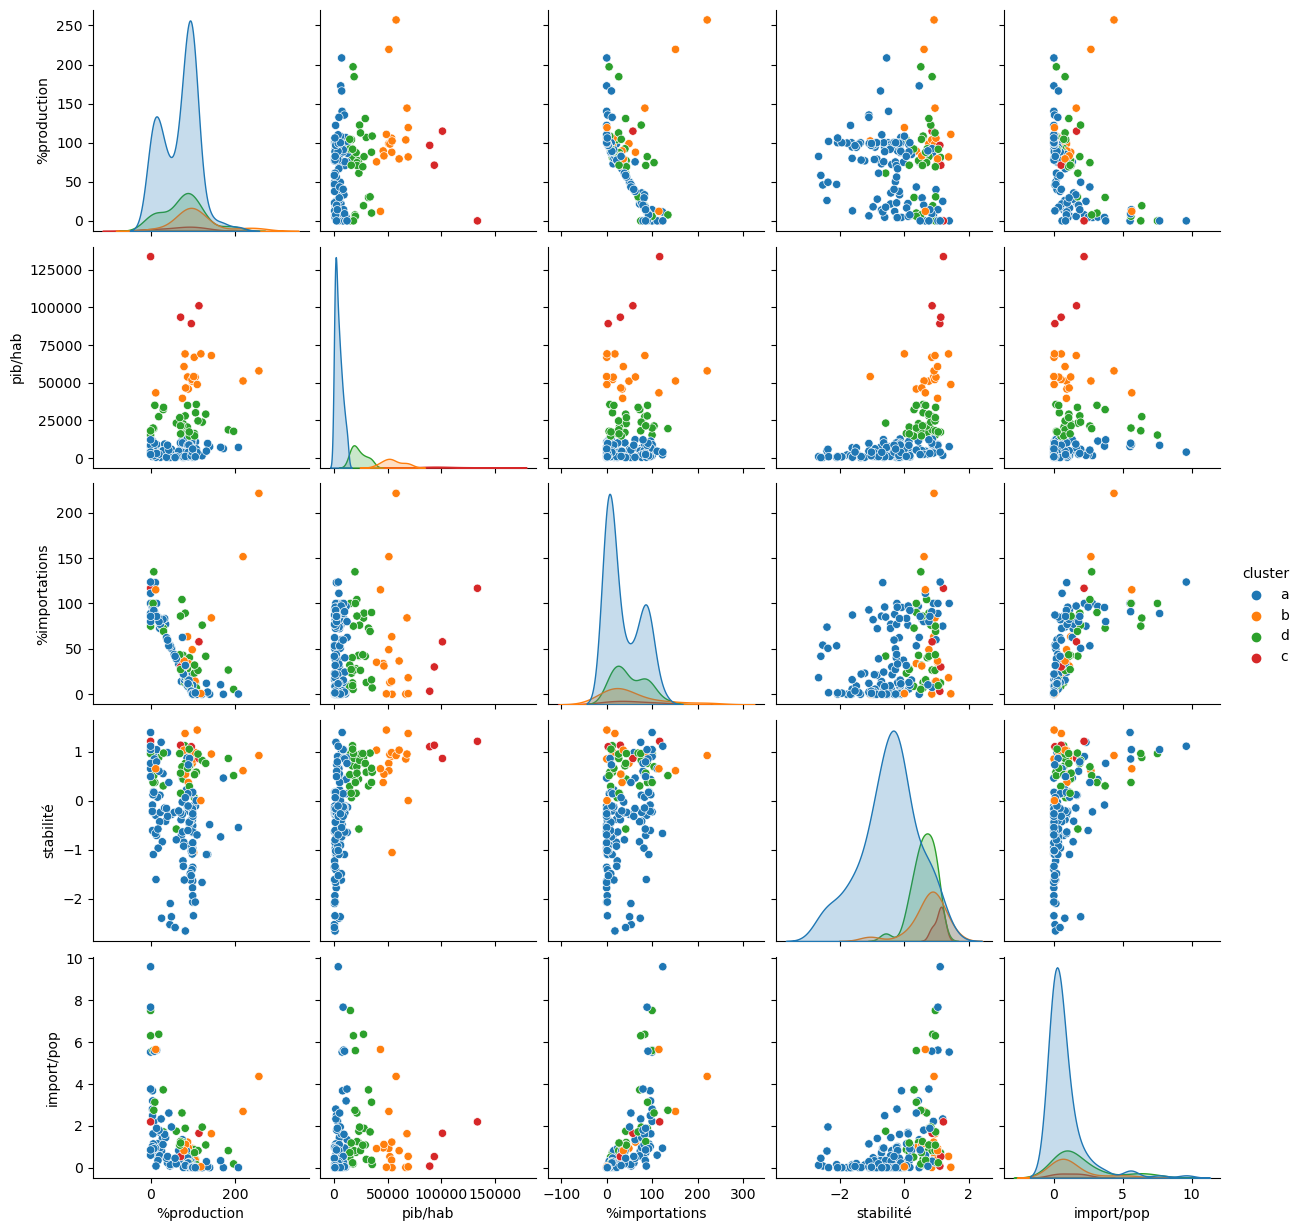

In [28]:
#Pairplot 
sns.pairplot(data=df_kmeans, hue='cluster')

On constate qu'il y a peu de différences dans notre étude entre la cah et le kmeans. 5 pays seulement sont passés d'un groupe à un autre

## Calcul des centroïds

In [29]:
centroids = kmeans.cluster_centers_
centroids

array([[ 6.83841803e+01,  4.28475657e+03,  3.69473770e+01,
        -4.67095950e-01,  8.22368248e-01],
       [ 1.09925294e+02,  5.48249338e+04,  5.10517647e+01,
         7.22941176e-01,  1.27900661e+00],
       [ 7.06675000e+01,  1.04405368e+05,  5.19625000e+01,
         1.07500000e+00,  1.10938644e+00],
       [ 7.70980000e+01,  2.30956941e+04,  5.09183333e+01,
         5.97666667e-01,  1.94285553e+00]])

# PCA

In [30]:
df_kmeans.columns

Index(['%production', 'pib/hab', '%importations', 'stabilité', 'import/pop',
       'cluster'],
      dtype='object')

In [31]:
df_kmeans

,%production,pib/hab,%importations,stabilité,import/pop,cluster
pays,,,,,,
Afghanistan,45.90,372.548875,54.10,-2.53,0.082295,a
Afrique du Sud,73.02,7055.055176,14.13,-0.71,0.626344,a
Albanie,22.22,6396.461812,76.19,0.11,1.681432,a
Algérie,100.00,3700.324058,0.00,-0.88,0.000000,a
Allemagne,98.79,51073.117894,49.07,0.76,0.920769,b
...,...,...,...,...,...,...
Émirats arabes unis,12.17,43295.393082,115.00,0.65,5.648604,b
Équateur,100.00,5965.132871,0.23,-0.27,0.005619,a
États-Unis d'Amérique,119.34,69184.704400,0.74,0.00,0.042730,b


In [32]:
df_pca=df_kmeans.drop(['cluster'],axis=1)
df_pca

,%production,pib/hab,%importations,stabilité,import/pop
pays,,,,,
Afghanistan,45.90,372.548875,54.10,-2.53,0.082295
Afrique du Sud,73.02,7055.055176,14.13,-0.71,0.626344
Albanie,22.22,6396.461812,76.19,0.11,1.681432
Algérie,100.00,3700.324058,0.00,-0.88,0.000000
Allemagne,98.79,51073.117894,49.07,0.76,0.920769
...,...,...,...,...,...
Émirats arabes unis,12.17,43295.393082,115.00,0.65,5.648604
Équateur,100.00,5965.132871,0.23,-0.27,0.005619
États-Unis d'Amérique,119.34,69184.704400,0.74,0.00,0.042730


## Définition des données

In [33]:
X = df_pca.values
pays = df_pca.index
features = df_pca.columns

## Scaling des données

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]
#Moyenne et variance sont égale à 0 et 1

,0,1,2,3,4
mean,-0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0


In [35]:
n_components=5
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=5)

### Variance cumulée et visualisation

In [36]:
var=pca.explained_variance_ratio_ #variance de chaque catégorie
varcum=pca.explained_variance_ratio_.cumsum() #variance cumulée
x_list = range(1, n_components+1)


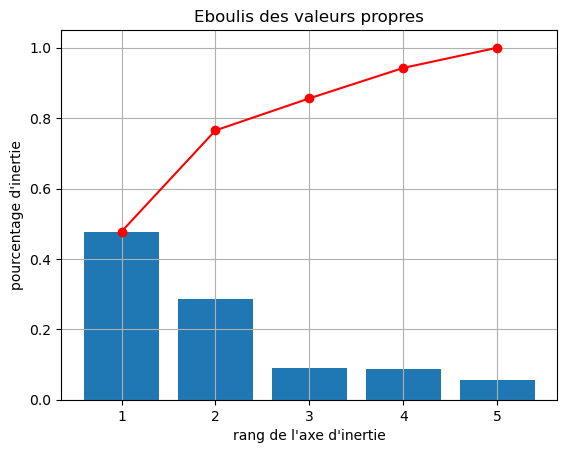

In [37]:
plt.bar(x_list, var)
plt.plot(x_list, varcum,c='red',marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.grid()
plt.show()

En bleu on observe l'inertie de chaque composante et en rouge l'inertie cumulée.

Quasiment 80% de l'inertie est comprise dans les 2 premières composantes.

### Components

In [38]:
pca.components_

array([[-0.40873443,  0.20889577,  0.55536617,  0.41035935,  0.55899226],
       [ 0.49222012,  0.69264311, -0.16782301,  0.49112232, -0.09273174],
       [-0.38385659,  0.63995542,  0.22138179, -0.51102945, -0.36462335],
       [ 0.63442961,  0.06427655,  0.40904336, -0.5097447 ,  0.4076904 ],
       [ 0.20201165, -0.25086584,  0.66863853,  0.26346406, -0.61625224]])

In [39]:
pcs = pd.DataFrame(pca.components_) # On obtient les composantes que l'on transforme en dataframe
pcs.columns = features # On utilise les catégories de notre df utilisé pour les clusters
pcs.index = [f"F{i}" for i in x_list] #On indexe F1, F2...
pcs.round(2) #On arrondi pour une lecture plus simple

,%production,pib/hab,%importations,stabilité,import/pop
F1,-0.41,0.21,0.56,0.41,0.56
F2,0.49,0.69,-0.17,0.49,-0.09
F3,-0.38,0.64,0.22,-0.51,-0.36
F4,0.63,0.06,0.41,-0.51,0.41
F5,0.20,-0.25,0.67,0.26,-0.62


<AxesSubplot:>

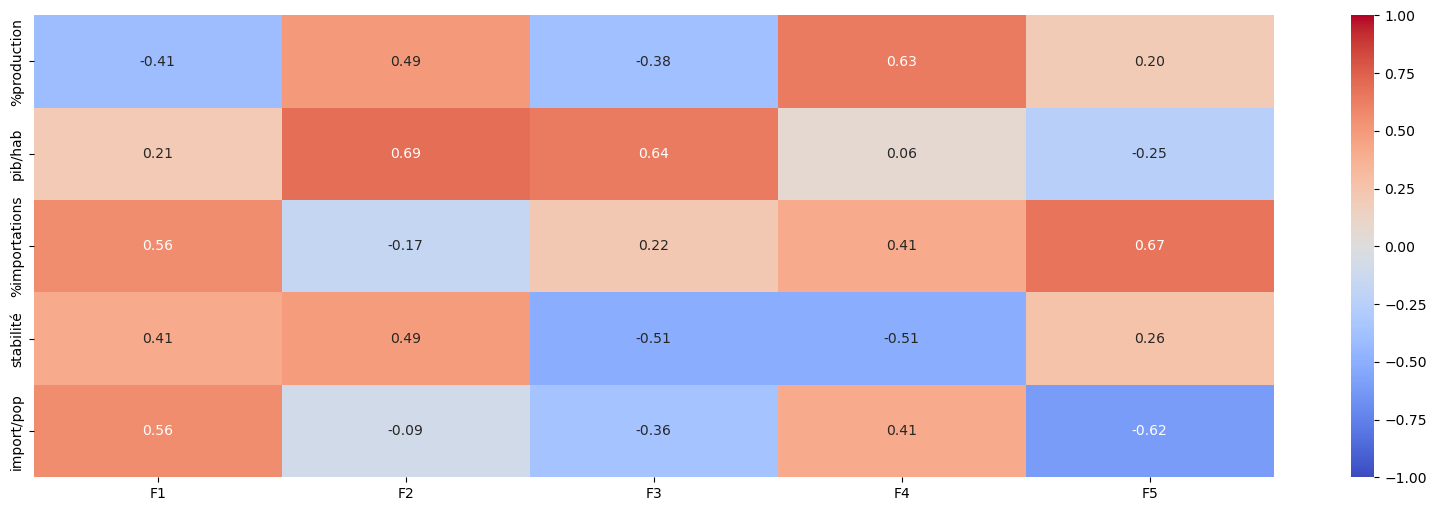

In [40]:
#On utilise une représentation plus visuelle de ce tableau 
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

### Cercle des corrélations

In [41]:
#Utilisation de la fonction pour créer le graphique

def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

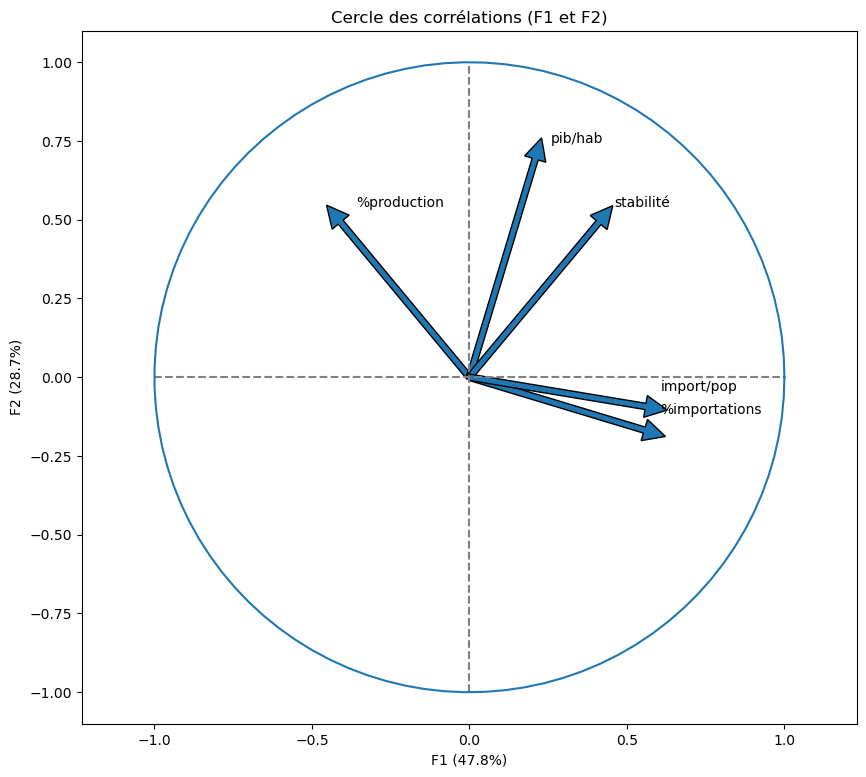

In [42]:
correlation_graph(pca, (0,1), features)

- L'axe F1 semble regrouper les variables lié à la forte importation.
- L'axe F2 semble lié fortement à la richesse des habitants  et à une forte stabilité.

## Projections

### Projections des individus

In [43]:
X_proj = pca.transform(X_scaled)

In [44]:
#Utilisation de la fonction de projection

def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    #plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                    c=kmeans.labels_, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14',ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


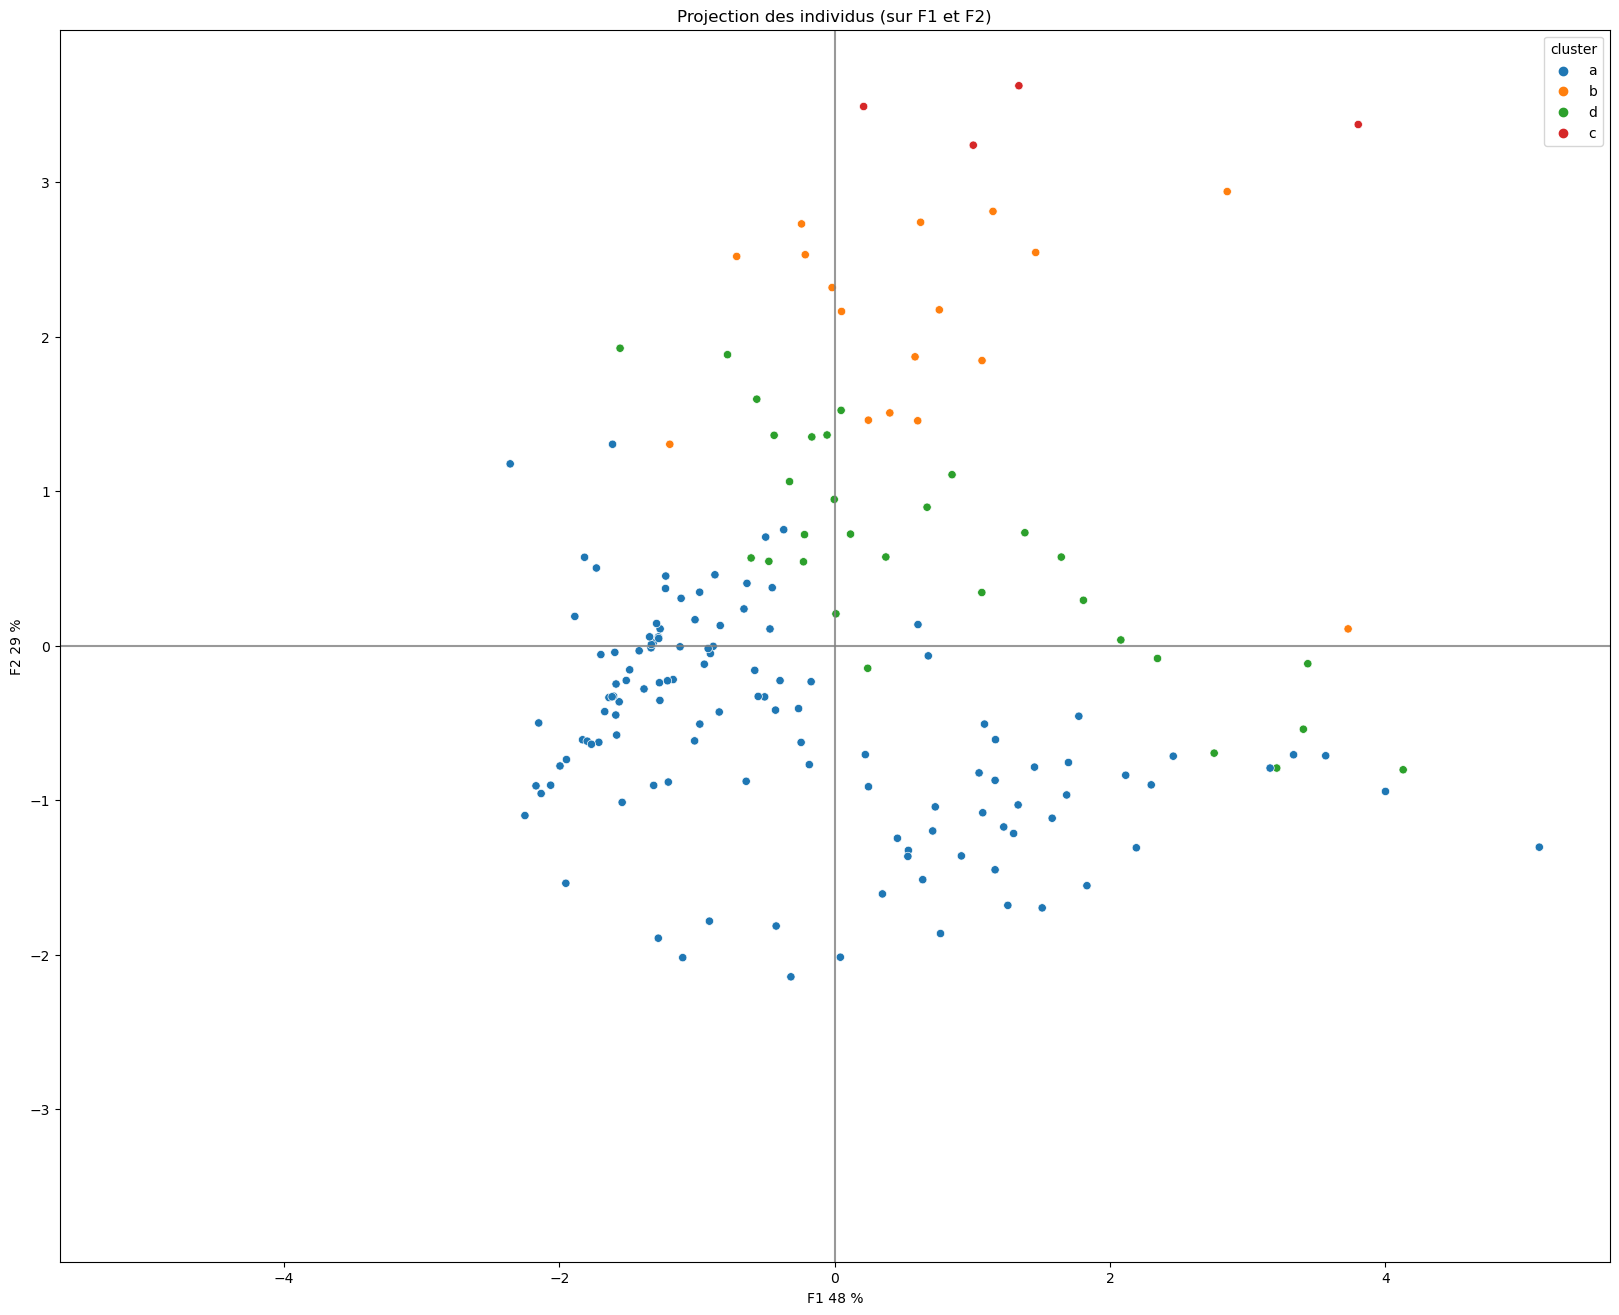

In [45]:
display_factorial_planes(X_proj, (0,1), pca,figsize=(20,16),  clusters=df_kmeans['cluster'], marker="o")


 - Nous allons nous consacrer sur les clusters présent dans le carré en haut à droite car ce sont des pays pour la plupart qui semblent assez riche, stable et avec une importation intéressante.
 

# Choix des pays

## sous échantillonage

In [46]:
df3=df.join(df_kmeans['cluster']) #jointure du df original avec toutes les données et les indications de clusters

In [47]:
df5=df3.drop(df3[df3['cluster']=='a'].index) #On enlève les pays du cluster qui ne répondent pas à nos critères

In [48]:
df5.shape #Nous avons biens nos 51 pays potentiels d'investissements

(51, 17)

## Importations %

Text(0.5, 1.0, 'Distribution des importations par groupes')

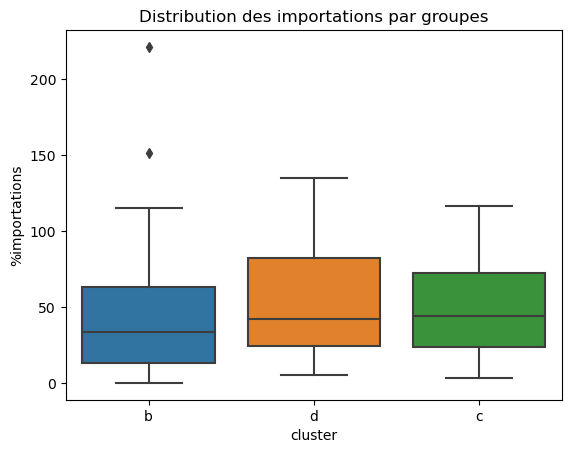

In [49]:
sns.boxplot(data=df5, y='%importations', x='cluster')
plt.title('Distribution des importations par groupes')


In [50]:
df5['%importations'].describe()

count     51.000000
mean      51.044706
std       45.649731
min        0.000000
25%       15.150000
50%       36.640000
75%       79.965000
max      221.160000
Name: %importations, dtype: float64

Dans cet échantillon, nous choisissons les pays qui ont une importations au moins de 15% de leur disponibilité intérieure, ce qui correspond au 1er quartile

In [51]:
df6=df5.loc[df5['%importations']>15]
df6.shape

(38, 17)

## Evolution des importations

Dans ce nouvel échantillon, nous gardons les pays qui ont un taux d'évolution des importations positifs

In [52]:
df6['importations_CAGR%'].describe()

count    38.000000
mean      0.564737
std       3.049899
min      -6.510000
25%      -1.467500
50%       0.120000
75%       2.717500
max       6.380000
Name: importations_CAGR%, dtype: float64

In [53]:
df7=df6.loc[df6['importations_CAGR%']>0]
df7.shape # il nous reste 19 pays

(19, 17)

## Evolution de la production

On peut encore réduire cette liste de pays qui ont un taux d'évolution de production inférieure à la médiane des pays

In [54]:
df7['productions_CAGR%'].median()

1.18

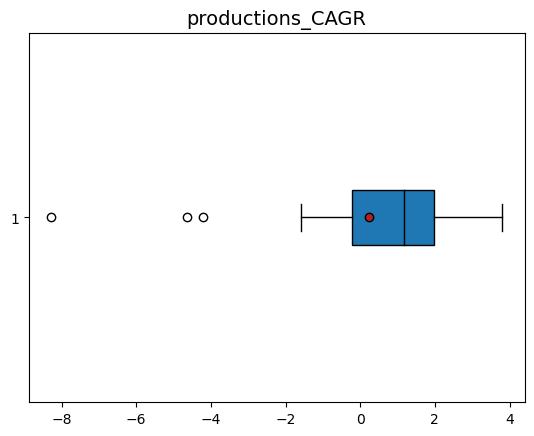

In [55]:
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.boxplot(df7['productions_CAGR%'], showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('productions_CAGR', fontsize=14)


plt.show()

In [56]:
df8=df7.loc[df7['productions_CAGR%']<1.18]

In [57]:
df8

,dispo_interieure,dispo_interieure_CAGR%,production,productions_CAGR%,%production,importations,importations_CAGR%,%importations,population (milliers),population_CAGR%,pib/hab,pib/hab_CAGR%,pib (millions$),pib (millions$)_CAGR%,stabilité,stabilité_moy,cluster
pays,,,,,,,,,,,,,,,,,
France,1806.0,0.60,1616.0,-1.58,89.48,611.0,3.84,33.83,64531.444,0.12,45836.255567,2.53,2.957880e+06,2.65,0.37,0.260,b
Lituanie,71.0,-2.84,87.0,-8.28,122.54,54.0,4.18,76.06,2786.651,-0.82,23844.125650,7.72,6.644526e+04,6.83,0.82,0.810,d
Luxembourg,12.0,1.76,0.0,0.00,0.00,14.0,3.13,116.67,639.321,1.40,133745.401502,3.95,8.550624e+04,5.41,1.21,1.296,c
Pays-Bas (Royaume des),345.0,3.53,887.0,-4.20,257.10,763.0,4.65,221.16,17501.696,0.34,57871.349210,3.61,1.012847e+06,3.97,0.92,0.880,b
Polynésie française,17.0,1.22,1.0,0.00,5.88,17.0,2.53,100.00,304.032,0.57,19914.599059,0.17,6.054675e+03,0.75,0.37,0.260,d
Portugal,319.0,-0.37,359.0,-0.11,112.54,84.0,0.48,26.33,10290.103,-0.03,24651.176435,2.80,2.536631e+05,2.76,0.95,1.058,d
Slovaquie,79.0,-0.25,56.0,-4.64,70.89,68.0,1.54,86.08,5447.622,0.03,21390.452770,4.00,1.165271e+05,4.03,0.56,0.702,d
Slovénie,55.0,1.52,72.0,1.15,130.91,23.0,2.83,41.82,2119.410,0.20,29134.800032,4.70,6.174859e+04,4.91,0.76,0.810,d
Émirats arabes unis,460.0,-1.46,56.0,-0.35,12.17,529.0,2.44,115.00,9365.145,0.65,43295.393082,0.36,4.054676e+05,1.01,0.65,0.656,b


7 de ces 9 pays sont en Europe ! En enlevant la France, on peut tomber à 6 pays potentiels d'investissements.

In [58]:
pays_noneurope=['France','Polynésie française','Émirats arabes unis']

In [59]:
pays_noneurope

['France', 'Polynésie française', 'Émirats arabes unis']

In [60]:
df9=df8.loc[~df8.index.isin(pays_noneurope)]
print(df9.columns)
variables_finales=['importations',
       'importations_CAGR%', '%importations', 'population (milliers)',
       'population_CAGR%', 'pib/hab', 'pib/hab_CAGR%','stabilité']
df9=df9[variables_finales]
df9

Index(['dispo_interieure', 'dispo_interieure_CAGR%', 'production',
       'productions_CAGR%', '%production', 'importations',
       'importations_CAGR%', '%importations', 'population (milliers)',
       'population_CAGR%', 'pib/hab', 'pib/hab_CAGR%', 'pib (millions$)',
       'pib (millions$)_CAGR%', 'stabilité', 'stabilité_moy', 'cluster'],
      dtype='object')


,importations,importations_CAGR%,%importations,population (milliers),population_CAGR%,pib/hab,pib/hab_CAGR%,stabilité
pays,,,,,,,,
Lituanie,54.0,4.18,76.06,2786.651,-0.82,23844.125650,7.72,0.82
Luxembourg,14.0,3.13,116.67,639.321,1.40,133745.401502,3.95,1.21
Pays-Bas (Royaume des),763.0,4.65,221.16,17501.696,0.34,57871.349210,3.61,0.92
Portugal,84.0,0.48,26.33,10290.103,-0.03,24651.176435,2.80,0.95
Slovaquie,68.0,1.54,86.08,5447.622,0.03,21390.452770,4.00,0.56
Slovénie,23.0,2.83,41.82,2119.410,0.20,29134.800032,4.70,0.76
